Saving tttsla.jpg to tttsla.jpg
{'inference_id': '50c1ea9d-b0af-4aa1-b7e9-8280f89babf1', 'time': 0.03782950599998003, 'image': {'width': 275, 'height': 183}, 'predictions': [{'x': 68.5, 'y': 94.5, 'width': 133.0, 'height': 167.0, 'confidence': 0.7795578241348267, 'class': 'EV_Charger - v5 2024-02-21 10-57pm', 'class_id': 0, 'detection_id': 'aafab8b8-b905-411a-aacf-2fb71c138d56'}]}


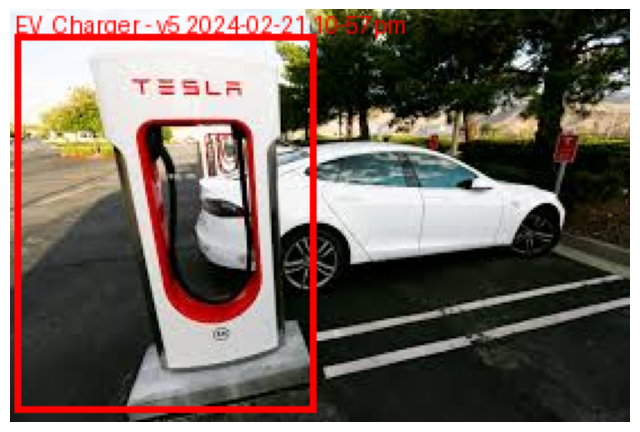

In [ ]:

from google.colab import files
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import requests
from inference_sdk import InferenceHTTPClient


# Instala o inference-sdk, se ainda não estiver instalado
try:
    # Tenta importar o módulo
    from inference_sdk import InferenceHTTPClient  # noqa: F401
except ImportError:
    !pip install inference-sdk

# Inicializa o cliente com a URL e a chave API
CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="PH63YsNXfScM9AgIGGR5"
)

# Carrega a imagem
uploaded = files.upload()
if uploaded:  # Verifica se uma imagem foi realmente carregada
    image_path = list(uploaded.keys())[0]

    try:
        # Executa a inferência na imagem carregada
        result = CLIENT.infer(image_path, model_id="modelogs/1")
        print(result)

        # Abre a imagem carregada
        image = Image.open(image_path)

        # Cria um objeto de desenho
        draw = ImageDraw.Draw(image)

        # Verifica se há previsões e itera por elas
        if 'predictions' in result and isinstance(result['predictions'], list):
          for prediction in result['predictions']:
              # Extrai as coordenadas da caixa delimitadora
              try:
                  x = prediction['x']
                  y = prediction['y']
                  width = prediction['width']
                  height = prediction['height']
                  left = x - width / 2
                  top = y - height / 2
                  right = x + width / 2
                  bottom = y + height / 2

                  # Desenha a caixa delimitadora
                  draw.rectangle([left, top, right, bottom], outline="red", width=3)

                  # Adiciona o rótulo acima da caixa
                  label = prediction['class']
                  draw.text((left, top - 10), label, fill="red")
              except KeyError as e:
                  print(f"Aviso: Chave ausente {e} na previsão. Pulando esta previsão.")


        # Exibe a imagem com as previsões usando matplotlib
        plt.figure(figsize=(8, 8))
        plt.imshow(image)
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Ocorreu um erro: {e}")
else:
    print("Nenhuma imagem foi carregada.")
